In [17]:
from selenium import webdriver

driver = webdriver.Chrome('../driver/chromedriver')
driver.get("http://www.opinet.co.kr/searRgSelect.do")

In [18]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")

In [19]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [9]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])

In [11]:
xpath = """//*[@id="searRgSelect"]"""
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [12]:
xpath = """//*[@id="glopopd_excel"]"""
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [20]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))

In [21]:
driver.close()

# 구별 주유 가격에 대한 데이터의 정리

In [23]:
import pandas as pd
from glob import glob

In [24]:
glob('../data/지역*.xls')

['../data/지역_위치별(주유소) (9).xls',
 '../data/지역_위치별(주유소) (12).xls',
 '../data/지역_위치별(주유소) (5).xls',
 '../data/지역_위치별(주유소) (24).xls',
 '../data/지역_위치별(주유소) (4).xls',
 '../data/지역_위치별(주유소) (13).xls',
 '../data/지역_위치별(주유소) (8).xls',
 '../data/지역_위치별(주유소) (3).xls',
 '../data/지역_위치별(주유소) (18).xls',
 '../data/지역_위치별(주유소) (22).xls',
 '../data/지역_위치별(주유소) (14).xls',
 '../data/지역_위치별(주유소) (15).xls',
 '../data/지역_위치별(주유소) (23).xls',
 '../data/지역_위치별(주유소) (19).xls',
 '../data/지역_위치별(주유소) (2).xls',
 '../data/지역_위치별(주유소) (20).xls',
 '../data/지역_위치별(주유소) (1).xls',
 '../data/지역_위치별(주유소) (16).xls',
 '../data/지역_위치별(주유소) (17).xls',
 '../data/지역_위치별(주유소) (21).xls',
 '../data/지역_위치별(주유소) (10).xls',
 '../data/지역_위치별(주유소).xls',
 '../data/지역_위치별(주유소) (7).xls',
 '../data/지역_위치별(주유소) (6).xls',
 '../data/지역_위치별(주유소) (11).xls']

In [26]:
stations_files = glob('../data/지역*.xls')
stations_files

['../data/지역_위치별(주유소) (9).xls',
 '../data/지역_위치별(주유소) (12).xls',
 '../data/지역_위치별(주유소) (5).xls',
 '../data/지역_위치별(주유소) (24).xls',
 '../data/지역_위치별(주유소) (4).xls',
 '../data/지역_위치별(주유소) (13).xls',
 '../data/지역_위치별(주유소) (8).xls',
 '../data/지역_위치별(주유소) (3).xls',
 '../data/지역_위치별(주유소) (18).xls',
 '../data/지역_위치별(주유소) (22).xls',
 '../data/지역_위치별(주유소) (14).xls',
 '../data/지역_위치별(주유소) (15).xls',
 '../data/지역_위치별(주유소) (23).xls',
 '../data/지역_위치별(주유소) (19).xls',
 '../data/지역_위치별(주유소) (2).xls',
 '../data/지역_위치별(주유소) (20).xls',
 '../data/지역_위치별(주유소) (1).xls',
 '../data/지역_위치별(주유소) (16).xls',
 '../data/지역_위치별(주유소) (17).xls',
 '../data/지역_위치별(주유소) (21).xls',
 '../data/지역_위치별(주유소) (10).xls',
 '../data/지역_위치별(주유소).xls',
 '../data/지역_위치별(주유소) (7).xls',
 '../data/지역_위치별(주유소) (6).xls',
 '../data/지역_위치별(주유소) (11).xls']

In [27]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [28]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 10
Data columns (total 10 columns):
지역       524 non-null object
상호       524 non-null object
주소       524 non-null object
상표       524 non-null object
전화번호     524 non-null object
셀프여부     524 non-null object
고급휘발유    524 non-null object
휘발유      524 non-null object
경유       524 non-null object
실내등유     524 non-null object
dtypes: object(10)
memory usage: 45.0+ KB


In [29]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,1571,1371,940
1,서울특별시,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),현대오일뱅크,02-902-5189,N,-,1571,1371,-
2,서울특별시,극동유화(주)대안주유소,서울 도봉구 마들로 574 (창동),S-OIL,02-996-6640,Y,-,1572,1372,-
3,서울특별시,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),SK에너지,02-996-5151,Y,-,1577,1377,-
4,서울특별시,쌍문주유소,서울특별시 도봉구 도봉로 547 (쌍문동),S-OIL,02-992-0220,Y,-,1579,1379,1000


In [31]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                       '주소':station_raw['주소'],
                       '가격':station_raw['휘발유'],
                       '셀프':station_raw['셀프여부'],
                       '상표':station_raw['상표']})
stations.head()

,Oil_store,가격,상표,셀프,주소
0,도봉제일주유소(주)송만에너지,1571,현대오일뱅크,N,서울특별시 도봉구 도봉로 783 (도봉동)
1,한이에너지(주)KLP제1주유소,1571,현대오일뱅크,N,서울특별시 도봉구 도봉로 596 (창동)
2,극동유화(주)대안주유소,1572,S-OIL,Y,서울 도봉구 마들로 574 (창동)
3,정다운셀프주유소,1577,SK에너지,Y,서울특별시 도봉구 도봉로 635 (쌍문동)
4,쌍문주유소,1579,S-OIL,Y,서울특별시 도봉구 도봉로 547 (쌍문동)


In [32]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,가격,상표,셀프,주소,구
0,도봉제일주유소(주)송만에너지,1571,현대오일뱅크,N,서울특별시 도봉구 도봉로 783 (도봉동),도봉구
1,한이에너지(주)KLP제1주유소,1571,현대오일뱅크,N,서울특별시 도봉구 도봉로 596 (창동),도봉구
2,극동유화(주)대안주유소,1572,S-OIL,Y,서울 도봉구 마들로 574 (창동),도봉구
3,정다운셀프주유소,1577,SK에너지,Y,서울특별시 도봉구 도봉로 635 (쌍문동),도봉구
4,쌍문주유소,1579,S-OIL,Y,서울특별시 도봉구 도봉로 547 (쌍문동),도봉구


In [33]:
stations['구'].unique()

array(['도봉구', '특별시', '마포구', '광진구', '중랑구', '관악구', '서대문구', '노원구', '강서구',
       '양천구', '종로구', '서초구', '성동구', '서울특별시', '중구', '영등포구', '강북구', '용산구',
       '강동구', '성북구', '송파구', '은평구', '동대문구', '강남구', '금천구', '구로구', '동작구'],
      dtype=object)

In [34]:
stations[stations['구']=='서울특별시']

,Oil_store,가격,상표,셀프,주소,구
11,SK네트웍스(주)효진주유소,1729,SK에너지,N,1 서울특별시 성동구 동일로 129 (성수동2가),서울특별시


In [35]:
stations[stations['구']=='서울특별시'] = '성동구'
stations['구'].unique()

array(['도봉구', '특별시', '마포구', '광진구', '중랑구', '관악구', '서대문구', '노원구', '강서구',
       '양천구', '종로구', '서초구', '성동구', '중구', '영등포구', '강북구', '용산구', '강동구',
       '성북구', '송파구', '은평구', '동대문구', '강남구', '금천구', '구로구', '동작구'],
      dtype=object)

In [36]:
stations[stations['구']=='특별시']

,Oil_store,가격,상표,셀프,주소,구
8,서현주유소,1594,S-OIL,Y,서울 특별시 도봉구 방학로 142 (방학동),특별시


In [38]:
stations[stations['구']=='특별시'] = '도봉구'
stations['구'].unique()

array(['도봉구', '마포구', '광진구', '중랑구', '관악구', '서대문구', '노원구', '강서구', '양천구',
       '종로구', '서초구', '성동구', '중구', '영등포구', '강북구', '용산구', '강동구', '성북구',
       '송파구', '은평구', '동대문구', '강남구', '금천구', '구로구', '동작구'], dtype=object)

In [39]:
stations[stations['가격']=='-']

,Oil_store,가격,상표,셀프,주소,구
18,SK네트웍스(주)도봉행복주유소,-,SK에너지,Y,서울특별시 도봉구 도봉로 941 (도봉동),도봉구
13,서강주유소,-,SK에너지,N,서울 마포구 독막로 134 (창전동),마포구
17,형제주유소,-,S-OIL,N,서울 관악구 남부순환로 1520 (신림동),관악구
34,하이웨이주유소,-,S-OIL,N,서울 강서구 공항대로 432 (화곡동),강서구
25,목동주유소,-,S-OIL,N,서울 양천구 목동중앙로 125 (목동),양천구
33,SK네트웍스직영여의도주유소,-,SK에너지,N,서울 영등포구 의사당대로 154 (여의도동),영등포구
34,하나주유소,-,S-OIL,N,서울특별시 영등포구 도림로 236 (신길동),영등포구
11,새한주유소,-,SK에너지,Y,서울특별시 강북구 도봉로 75 (미아동),강북구
18,명진석유(주)동서울주유소,-,GS칼텍스,Y,서울특별시 강동구 천호대로 1456 (상일동),강동구


In [48]:
stations[stations['가격']=='도봉구'] = '-'
stations[stations['가격']=='성동구'] = '-'
stations = stations[stations['가격']!='-']
stations.head()

,Oil_store,가격,상표,셀프,주소,구
0,도봉제일주유소(주)송만에너지,1571,현대오일뱅크,N,서울특별시 도봉구 도봉로 783 (도봉동),도봉구
1,한이에너지(주)KLP제1주유소,1571,현대오일뱅크,N,서울특별시 도봉구 도봉로 596 (창동),도봉구
2,극동유화(주)대안주유소,1572,S-OIL,Y,서울 도봉구 마들로 574 (창동),도봉구
3,정다운셀프주유소,1577,SK에너지,Y,서울특별시 도봉구 도봉로 635 (쌍문동),도봉구
4,쌍문주유소,1579,S-OIL,Y,서울특별시 도봉구 도봉로 547 (쌍문동),도봉구


In [49]:
stations['가격'] = [float(value) for value in stations['가격']]

In [50]:
stations.reset_index(inplace=True)
del stations['index']

In [51]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 6 columns):
Oil_store    513 non-null object
가격           513 non-null float64
상표           513 non-null object
셀프           513 non-null object
주소           513 non-null object
구            513 non-null object
dtypes: float64(1), object(5)
memory usage: 24.1+ KB


# 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform
from matplotlib import font_manager, rc
rc('font',family='AppleGothic')

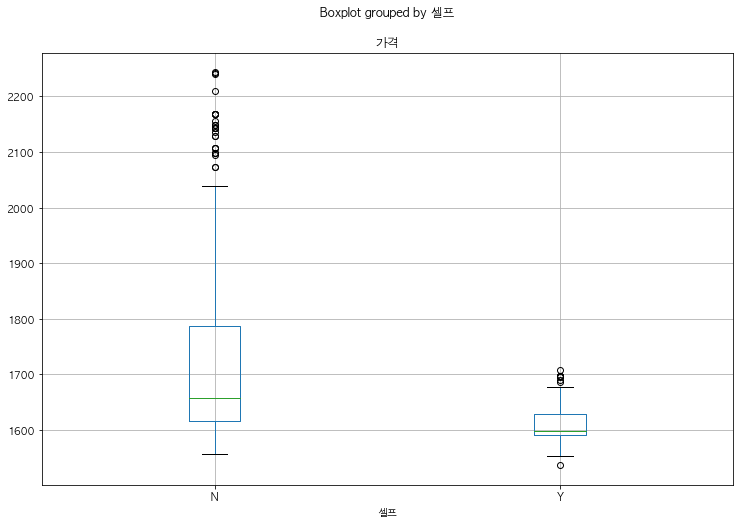

In [55]:
stations.boxplot(column='가격', by='셀프', figsize=(12, 8));

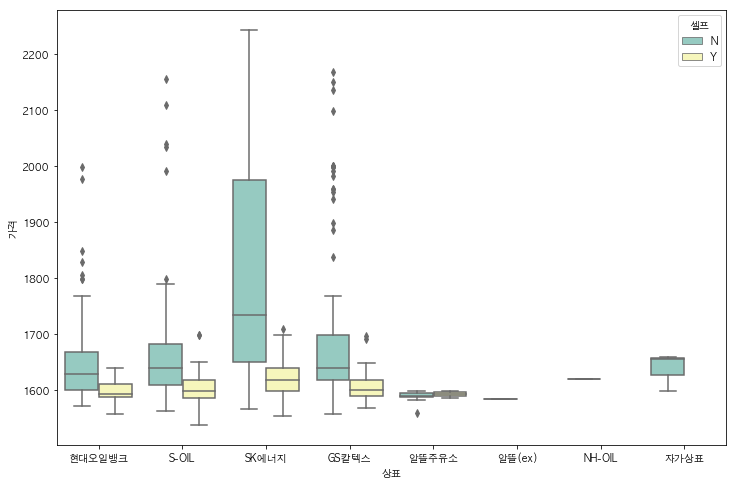

In [56]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표",y="가격",hue="셀프",data=stations, palette="Set3")
plt.show()

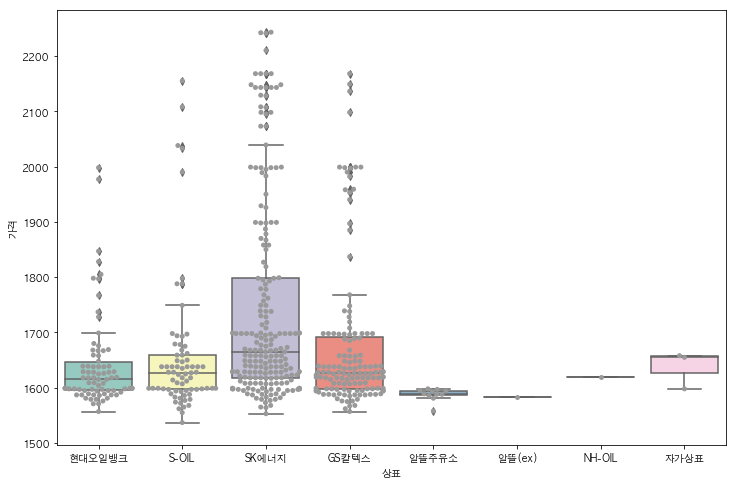

In [58]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표",y="가격",data=stations, palette="Set3")
sns.swarmplot(x="상표",y="가격",data=stations, color=".6")
plt.show()

In [59]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category= FutureWarning)

In [60]:
stations.sort_values(by="가격", ascending=False).head(10)

,Oil_store,가격,상표,셀프,주소,구
252,서남주유소,2243.0,SK에너지,N,서울 중구 통일로 30 (봉래동1가),중구
251,장충주유소,2242.0,SK에너지,N,서울 중구 장충단로 202 (장충동1가),중구
223,양재주유소,2241.0,SK에너지,N,서울 서초구 바우뫼로 178 (양재동),서초구
465,뉴서울(강남),2210.0,SK에너지,N,서울 강남구 언주로 716 (논현동),강남구
311,한남지점,2168.0,SK에너지,N,서울 용산구 한남대로21길 4 (한남동),용산구
250,주)중앙에너비스 퇴계로지점,2168.0,SK에너지,N,서울특별시 중구 퇴계로 228 (필동2가),중구
182,(주)대양씨앤씨,2168.0,GS칼텍스,N,서울 종로구 사직로 65 (사직동),종로구
181,(주)중앙에너비스혜화주유소,2168.0,SK에너지,N,서울 종로구 창경궁로35길 1 (혜화동),종로구
310,에너비스,2168.0,SK에너지,N,서울 용산구 한남대로21길 4 (한남동),용산구
352,삼선주유소,2155.0,S-OIL,N,서울특별시 성북구 창경궁로 324 (삼선동1가),성북구


In [61]:
stations.sort_values(by="가격", ascending=True).head(10)

,Oil_store,가격,상표,셀프,주소,구
286,북서울고속주유소,1537.0,S-OIL,Y,서울특별시 강북구 삼양로 410 (수유동),강북구
115,강서오곡셀프주유소,1553.0,SK에너지,Y,서울특별시 강서구 벌말로 254 (오곡동),강서구
224,(주)서울에너지 직영,1555.0,S-OIL,Y,서울 성동구 천호대로 324 (용답동),성동구
330,강산주유소,1557.0,GS칼텍스,N,서울 성북구 보문로 27 (보문동7가),성북구
384,(주)명연에너지 수색훼미리주유소,1557.0,현대오일뱅크,Y,서울 은평구 수색로 236 (수색동),은평구
331,원천주유소,1558.0,알뜰주유소,N,서울특별시 성북구 돌곶이로 142 (장위동),성북구
332,신방주유소,1562.0,S-OIL,N,서울특별시 성북구 안암로 111 (안암동5가),성북구
402,재원에너지(주)용일주유소,1562.0,GS칼텍스,N,서울 동대문구 안암로 54 (용두동),동대문구
385,타이거주유소,1564.0,SK에너지,Y,서울 은평구 수색로 188 (증산동),은평구
480,처음처럼주유소,1565.0,S-OIL,N,서울 구로구 오리로 1299 (궁동),구로구


In [63]:
import numpy as np
gu_data = pd.pivot_table(stations, index=['구'], values=["가격"], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1837.190476
강동구,1691.222222
강북구,1582.545455
강서구,1637.764706
관악구,1647.000000


In [67]:
geo_path = '../../02.crime/data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path,encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map